In [9]:
import psycopg2
from sqlalchemy import create_engine
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time
import random
import plotly.express as px
from datetime import timedelta, datetime, tzinfo, timezone,  time
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

-----------------------------------------------------

In [10]:
general_path = 'E:/paper2_analysis/traffic_analysis/Omnitrans_denHelder'
figures_path = f'{general_path}/figures'
input_path = f'{general_path}/input'
output_path = f'{general_path}/output'

----------------------

#### create results dataframe

In [11]:
# ## ONLY TO CREATE NEW ONE

# results_df_ini  = pd.DataFrame(columns = {
#                             '_sim_code','result','scen','depth_thr', 'time_thr', 
#                             'hh_evaqzone', 'cleartime', 
#                             'left_zone_hh', 'left_zone_p', 
#                             'stuck_network_hh', 'stuck_network_p', 
#                             'safe_hh', 'safe_p', 'sim_day'})


# #add first dummy
# ini_sim = pd.DataFrame(['aa'],columns=['_sim_code'])
# results_df_ini = pd.concat([results_df_ini,ini_sim])

# results_df_ini.to_json(f'{output_path}/results_overview/overview_results.json')


In [12]:
# ## add done column
# results_df = pd.read_json(f'{output_path}/results_overview/overview_results.json')
# results_df['simday'] = np.nan
# results_df.to_json(f'{output_path}/results_overview/overview_results.json')

------------------

### read file

In [23]:
results_df = pd.read_json(f'{output_path}/results_overview/overview_results.json')
results_df


,_sim_code,simday,scen,result,hh_evaqzone,depth_thr,time_thr,cleartime,safe_hh,safe_p,left_zone_hh,left_zone_p,stuck_network_hh,stuck_network_p
0,aa,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f1_d1.5_a30_r60,30-08,scen1_voorpiek,60.0,22045.0,1.5,30.0,19.25,4708.0,21.0,11147.0,51.0,6190.0,28.0
2,f1_d2.0_a30_r61,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f1_d2.5_a30_r62,None,scen1_voorpiek,62.0,15610.0,2.5,30.0,35.83,5387.0,35.0,5634.0,36.0,4589.0,29.0
4,f1_d1.5_a60_r63,None,scen1_voorpiek,63.0,11600.0,1.5,60.0,35.83,4946.0,43.0,2895.0,25.0,3759.0,32.0
5,f1_d2.0_a60_r64,25-08,scen1_voorpiek,64.0,11595.0,2.0,60.0,NaN,4943.0,43.0,2896.0,25.0,3756.0,32.0
6,f1_d2.5_a60_r65,25-08,scen1_voorpiek,65.0,7430.0,2.5,60.0,25.92,4446.0,60.0,869.0,12.0,2115.0,28.0
7,f1_d2.7_a30_r66,25-08,scen1_voorpiek,66.0,10965.0,2.7,30.0,35.92,4782.0,44.0,4009.0,37.0,2174.0,20.0
8,f1_d2.5_a45_r67,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,f2_d1.5_a30_r70,25-08,scen2_napiek,70.0,10045.0,1.5,30.0,35.67,4812.0,48.0,3803.0,38.0,1430.0,14.0


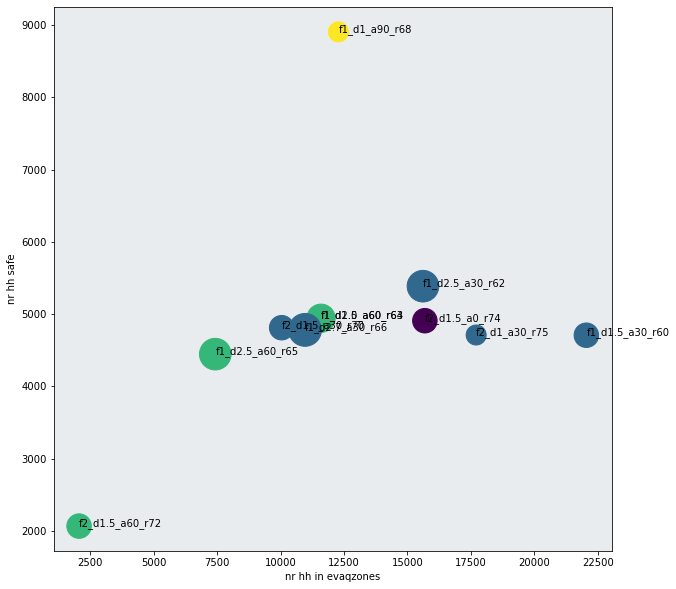

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#e9ecef')

labels = results_df._sim_code

ax.scatter(results_df.hh_evaqzone, results_df.safe_hh, s = results_df.depth_thr*400, c = results_df.time_thr)

for i, label in enumerate(labels):
    ax.annotate(label, (results_df.hh_evaqzone[i], results_df.safe_hh[i]))

plt.xlabel('nr hh in evaqzones')
plt.ylabel('nr hh safe')

plt.savefig(f'{figures_path}/ALL/overview.png')
                                                


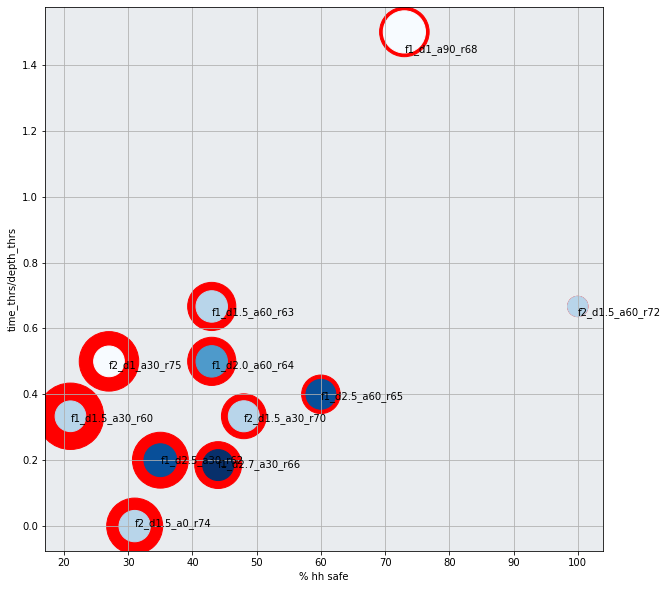

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#e9ecef')
plt.grid()


labels = results_df._sim_code

ax.scatter(results_df.safe_p, (results_df.time_thr/60)/results_df.depth_thr, s = results_df.hh_evaqzone/5, color = 'red'  )
ax.scatter(results_df.safe_p, (results_df.time_thr/60)/results_df.depth_thr, s = results_df.safe_hh/5,c = results_df.depth_thr, alpha = 1, cmap='Blues')

for i, label in enumerate(labels):
    ax.annotate(label, (results_df.safe_p[i], ((results_df.time_thr[i]/60)/results_df.depth_thr[i])*.96))

# ax.set_ylim(0, 100)
# ax.set_xlim(0, 100)

plt.xlabel('% hh safe')
plt.ylabel('time_thrs/depth_thrs')

plt.savefig(f'{figures_path}/ALL/overview_hh_p.png')


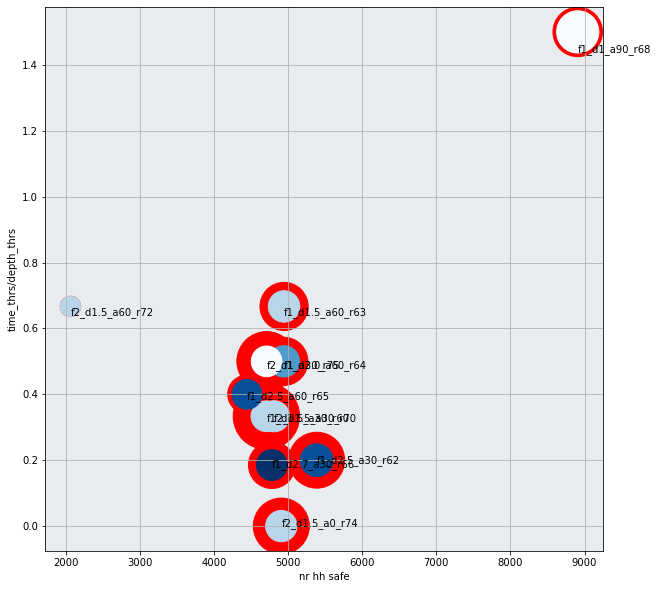

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#e9ecef')
plt.grid()


labels = results_df._sim_code

ax.scatter(results_df.safe_hh, (results_df.time_thr/60)/results_df.depth_thr, s = results_df.hh_evaqzone/5, color = 'red'  )
ax.scatter(results_df.safe_hh, (results_df.time_thr/60)/results_df.depth_thr, s = results_df.safe_hh/5,c = results_df.depth_thr, alpha = 1, cmap='Blues')

for i, label in enumerate(labels):
    ax.annotate(label, (results_df.safe_hh[i], ((results_df.time_thr[i]/60)/results_df.depth_thr[i])*.96))

# ax.set_ylim(0, 100)
# ax.set_xlim(0, 100)

plt.xlabel('nr hh safe')
plt.ylabel('time_thrs/depth_thrs')

plt.savefig(f'{figures_path}/ALL/overview_nr_hh.png')


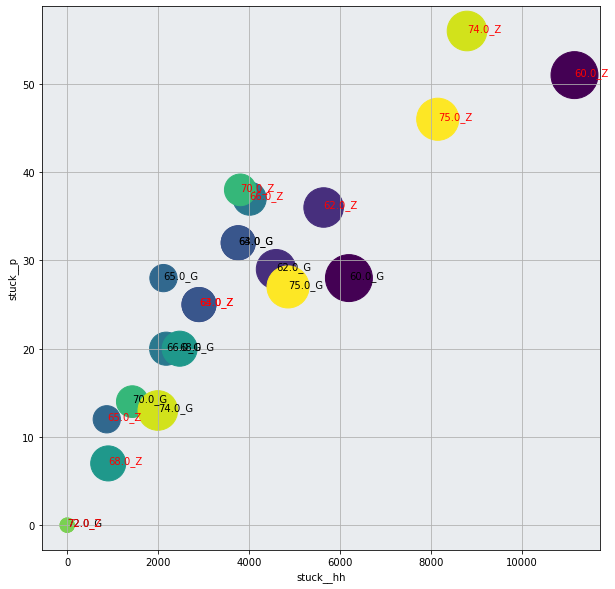

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#e9ecef')
plt.grid()


labels = results_df.result

ax.scatter(results_df.stuck_network_hh, results_df.stuck_network_p, s = results_df.hh_evaqzone/10, c = results_df.result )
ax.scatter(results_df.left_zone_hh, results_df.left_zone_p, s = results_df.hh_evaqzone/10, c = results_df.result  )
# ax.scatter(results_df.safe_hh, (results_df.time_thr/60)/results_df.depth_thr, s = results_df.safe_hh/5,c = results_df.depth_thr, alpha = 1, cmap='Blues')

for i, label in enumerate(labels):
    ax.annotate(f'{label}_G', (results_df.stuck_network_hh[i], results_df.stuck_network_p[i]), color='black')
    ax.annotate(f'{label}_Z', (results_df.left_zone_hh[i], results_df.left_zone_p[i]), color='red')


plt.xlabel('stuck__hh')
plt.ylabel('stuck__p')

plt.savefig(f'{figures_path}/ALL/stuck_network.png')

In [28]:
results_df.columns

Index(['_sim_code', 'simday', 'scen', 'result', 'hh_evaqzone', 'depth_thr',
       'time_thr', 'cleartime', 'safe_hh', 'safe_p', 'left_zone_hh',
       'left_zone_p', 'stuck_network_hh', 'stuck_network_p'],
      dtype='object')

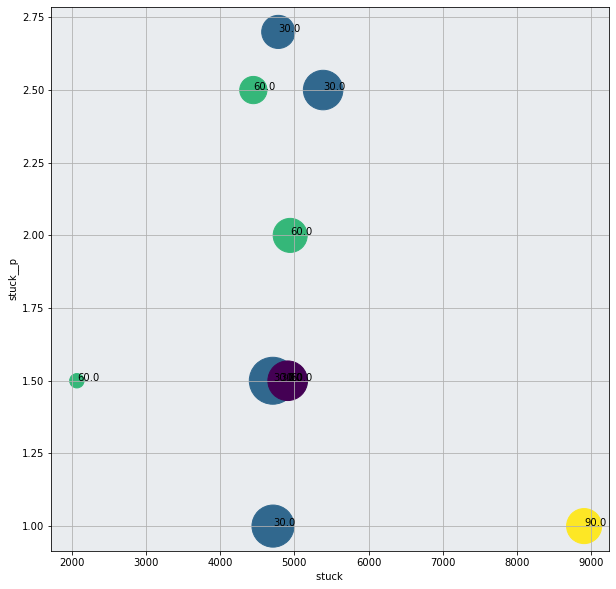

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#e9ecef')
plt.grid()


labels = results_df.time_thr
# labels = results_df.time_thr

ax.scatter(results_df.safe_hh, results_df.depth_thr, s = results_df.hh_evaqzone/10, c = results_df.time_thr )
# ax.scatter(results_df.left_zone_hh, results_df.left_zone_p, s = results_df.hh_evaqzone/10, c = results_df.result  )
# ax.scatter(results_df.safe_hh, (results_df.time_thr/60)/results_df.depth_thr, s = results_df.safe_hh/5,c = results_df.depth_thr, alpha = 1, cmap='Blues')

for i, label in enumerate(labels):
    ax.annotate(f'{label}', (results_df.safe_hh[i], results_df.depth_thr[i]), color='black')
#     ax.annotate(f'{label}_Z', (results_df.safe_hh[i], results_df.left_zone_p[i]), color='red')


plt.xlabel('stuck ')
plt.ylabel('stuck__p')

plt.savefig(f'{figures_path}/ALL/stuck_network.png')

In [30]:
# fig = plt.figure(figsize=(10, 10),frameon=False)
# ax = fig.add_subplot(1, 1, 1, frameon=False)
# # ax.set_facecolor('#e9ecef')

# labels = results_df._sim_code

# ax.scatter(results_df.time_thr, results_df.depth_thr, s = results_df.hh_evaqzone/10, c = '#ffc857', alpha = 0.4 )
# ax.scatter(results_df.time_thr, results_df.depth_thr, s = results_df.left_zone_hh/10, c = '#db3a34', alpha = 0.4)

# for i, label in enumerate(labels):
#     ax.annotate(label, (results_df.time_thr[i], results_df.depth_thr[i]))

# plt.savefig(f'{figures_path}/ALL/overview_left_zone.png')

In [31]:
# fig = plt.figure(figsize=(10, 10),frameon=False)
# ax = fig.add_subplot(1, 1, 1, frameon=False)
# # ax.set_facecolor('#e9ecef')

# labels = results_df._sim_code

# ax.scatter(results_df.stuck_network_hh, results_df.left_zone_hh, s = results_df.hh_evaqzone/10, c = '#ffc857', alpha = 0.4 )
# # ax.scatter(results_df.time_thr, results_df.depth_thr, s = results_df.left_zone_hh/10, c = '#db3a34', alpha = 0.4)

# for i, label in enumerate(labels):
#     ax.annotate(label, (results_df.time_thr[i], results_df.depth_thr[i]))

# plt.savefig(f'{figures_path}/ALL/overview_left_zone.png')

---------------------------

### add simulation codes

In [15]:
def add_new_sim(new_sim_id, results_df):
    if new_sim_id not in results_df._sim_code.values:
        print(f'{new_sim_id} added')
        new_sim = pd.DataFrame([new_sim_id],columns=['_sim_code'])
        results_df = pd.concat([results_df,new_sim], ignore_index=True)
        results_df.to_json(f'{output_path}/results_overview/overview_results.json')  
    else:
        print(f'{new_sim_id} is allready in list')
    return results_df

In [ ]:
currents_sims = ['f1_d1.5_a30_r60', 
                 'f1_d2.0_a30_r61', 
                 'f1_d2.5_a30_r62', 
                 'f1_d1.5_a60_r63', 
                 'f1_d2.0_a60_r64', 
                 'f1_d2.5_a60_r65', 
                 'f1_d2.7_a30_r66', 
                 'f1_d2.5_a45_r67', 
                 'f2_d1.5_a30_r70', 
                 'f2_d2.0_a30_r71', 
                 'f2_d1.5_a60_r72', 
                 'f2_d2.0_a60_r73', 
                 'f2_d1.5_a0_r74', 
                 'f2_d1_a30_r75']


In [ ]:
for i in currents_sims:
    results_df = add_new_sim(i, results_df)

In [ ]:
results_df.head(5)


In [ ]:
results_df

In [ ]:
results_df[results_df.result == 74]

## add one simulation

In [17]:
new_sim_id = 'f1_d1_a90_r68'

In [19]:
results_df = add_new_sim(new_sim_id, results_df)

f1_d1_a90_r68 added


In [20]:
results_df

,_sim_code,simday,scen,result,hh_evaqzone,depth_thr,time_thr,cleartime,safe_hh,safe_p,left_zone_hh,left_zone_p,stuck_network_hh,stuck_network_p
0,aa,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f1_d1.5_a30_r60,30-08,scen1_voorpiek,60.0,22045.0,1.5,30.0,19.25,4708.0,21.0,11147.0,51.0,6190.0,28.0
2,f1_d2.0_a30_r61,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f1_d2.5_a30_r62,None,scen1_voorpiek,62.0,15610.0,2.5,30.0,35.83,5387.0,35.0,5634.0,36.0,4589.0,29.0
4,f1_d1.5_a60_r63,None,scen1_voorpiek,63.0,11600.0,1.5,60.0,35.83,4946.0,43.0,2895.0,25.0,3759.0,32.0
5,f1_d2.0_a60_r64,25-08,scen1_voorpiek,64.0,11595.0,2.0,60.0,NaN,4943.0,43.0,2896.0,25.0,3756.0,32.0
6,f1_d2.5_a60_r65,25-08,scen1_voorpiek,65.0,7430.0,2.5,60.0,25.92,4446.0,60.0,869.0,12.0,2115.0,28.0
7,f1_d2.7_a30_r66,25-08,scen1_voorpiek,66.0,10965.0,2.7,30.0,35.92,4782.0,44.0,4009.0,37.0,2174.0,20.0
8,f1_d2.5_a45_r67,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,f2_d1.5_a30_r70,25-08,scen2_napiek,70.0,10045.0,1.5,30.0,35.67,4812.0,48.0,3803.0,38.0,1430.0,14.0
